In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.utils import shuffle
from scipy.stats import multivariate_normal

class GaussianMixtureModels(object):
    def __init__(self,K):
        self.f = 2    # no: of features
        self.N = 1200 # dataset size
        self.K = K    # cluster centers
        self.minimal_cost_defference = 0.1
        self.smoothing = 1e-2

    def create_data(self, m):
        X = np.zeros((self.N, self.f))

        mu1 = np.array([0,0])
        mu2 = np.array([m,m])
        mu3 = np.array([m,0])
        mu4 = np.array([0,m])

        X[:300,] = np.random.randn(300,self.f) + mu1
        X[300:600,] = np.random.randn(300,self.f) + mu2
        X[600:900,] = np.random.randn(300,self.f) + mu3
        X[900:1200,] = np.random.randn(300,self.f) + mu4

        plt.scatter(X[:,0],X[:,1])
        plt.title('before_apply_GMM')
        plt.show()
        self.X = X

    def initialize_param(self):
        Mu = np.zeros((self.K, self.f))
        Cov = np.zeros((self.K, self.f, self.f))
        self.pi = np.ones(self.K)/self.K

        for k in range(self.K):
            idx = np.random.choice(self.N)
            Mu[k] = self.X[idx]
            Cov[k] = np.eye(self.f)
        self.Mu = Mu
        self.Cov = Cov

    def calculate_parameters(self):
        Total_cost = []
        while True:
            R = np.zeros((self.N, self.K))
            for k in range(self.K):
                for n in range(self.N):
                    R[n,k] = self.pi[k] * multivariate_normal.pdf(self.X[n], self.Mu[k], self.Cov[k])

            cost = np.log(R.sum(axis=1)).sum()
            R = R / R.sum(axis=1, keepdims=True)

            self.R = R
            for k in range(self.K):
                Nk = self.R[:,k].sum()
                self.pi[k] = Nk / self.N
                Mu_k = self.R[:,k].dot(self.X)/Nk
                self.Mu[k] = Mu_k

                delta = self.X - Mu_k
                Rdelta = np.expand_dims(self.R[:,k], -1) * delta
                self.Cov[k] = Rdelta.T.dot(delta) / Nk + np.eye(self.f)*self.smoothing
            Total_cost.append(cost)
            if len(Total_cost) > 2:
                if np.abs(Total_cost[-2] - Total_cost[-1]) < self.minimal_cost_defference:
                    plt.plot(Total_cost)
                    plt.title("Total cost")
                    plt.show()

                    random_colors = np.random.random((self.K, 3))
                    colors = self.R.dot(random_colors)
                    plt.scatter(self.X[:,0], self.X[:,1], c=colors)
                    plt.title('GMM for K='+str(self.K))
                    plt.show()
                    break

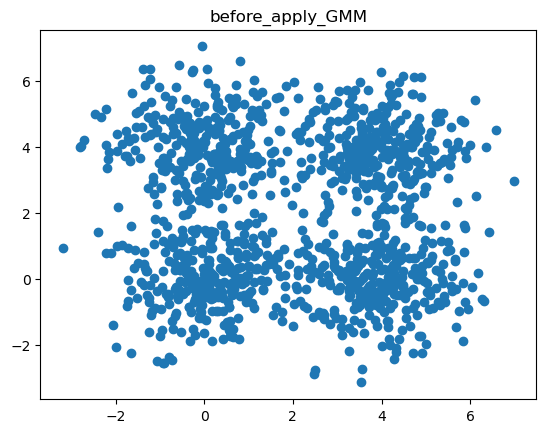

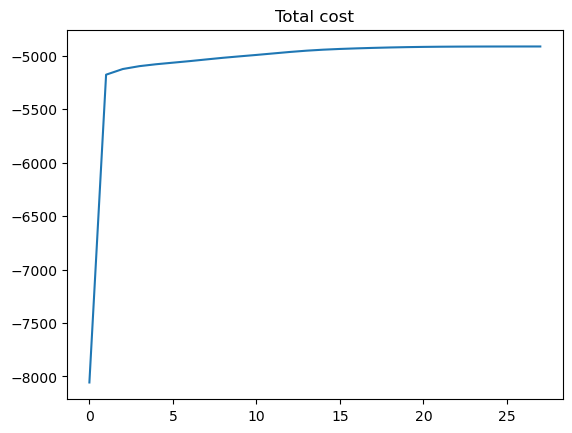

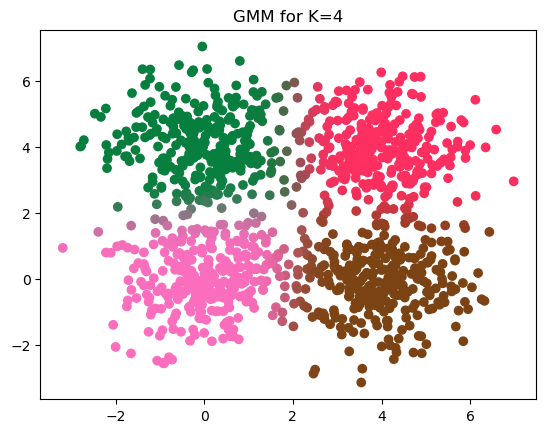

In [3]:
G=GaussianMixtureModels(4)
G.create_data(4)
G.initialize_param()
G.calculate_parameters()